
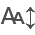

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import math
from statistics import NormalDist, mean
from collections import ChainMap
from statannotations.Annotator import Annotator
from IPython.display import HTML, display
import itables
itables.init_notebook_mode()
from itables import show
import seeg_utils
# import afidutils

In [2]:
root_dir = '../data'

In [3]:
subjects = [identifier[:8] for identifier in os.listdir(root_dir) if "sub-" in identifier]
print(len(subjects))

246


In [4]:
frame_subjects = [sub for sub in subjects if sub.startswith('sub-F')]
print(len(frame_subjects))

28


# QC Subjects - Confirm Coordinate System

In [5]:
for subject in sorted(subjects):
  planned_fcsv = f'{root_dir}/{subject}/{subject}_planned.fcsv'
  actual_fcsv = f'{root_dir}/{subject}/{subject}_actual.fcsv'
  if glob.glob(planned_fcsv) and glob.glob(actual_fcsv):
    planned_coordsym, planned_headFin = seeg_utils.determineFCSVCoordSystem(planned_fcsv)
    if any(x in planned_coordsym for x in {'LPS','1'}):
      print(f'Planned is in LPS for {subject}')
    actual_coordsym, actual_headFin = seeg_utils.determineFCSVCoordSystem(actual_fcsv)
    if any(x in actual_coordsym for x in {'LPS','1'}):
      print(f'Actual is in LPS for {subject}')
  else:
    print(f"Files not found, review {subject}")

In [6]:
# total_data = []
# frame_data = []
# for sub in sorted(subjects):
#   elec_data=[]
#   #print(sub)
#   planned_fcsv = f'{root_dir}/{sub}/{sub}_planned.fcsv'
#   actual_fcsv = f'{root_dir}/{sub}/{sub}_actual.fcsv'
#   if not glob.glob(planned_fcsv) or not glob.glob(actual_fcsv):
#     print(f"Files not found, review {sub}")
#     continue
#   coord_sys,headFin=seeg_utils.determineFCSVCoordSystem(planned_fcsv, overwrite_fcsv=True)

#   planned_df = pd.read_csv(planned_fcsv, skiprows=3, header=None)
#   actual_df = pd.read_csv(actual_fcsv, skiprows=3, header=None)

#   head_info=dict(ChainMap(*[{i:x} for i,x in enumerate(headFin)]))

#   planned_df=planned_df.iloc[:,:].rename(columns=head_info).reset_index(drop=True)
#   actual_df=actual_df.iloc[:,:].rename(columns=head_info).reset_index(drop=True)

#   groups_planned, planned_all = seeg_utils.determine_groups(np.array(planned_df['label'].values))
#   label_set=sorted(set(groups_planned), key=groups_planned.index)

#   groups_actual, actual_all = seeg_utils.determine_groups(np.array(actual_df['label'].values))
#   label_set_actual=sorted(set(groups_actual), key=groups_actual.index)

#   for group in label_set_actual:
#     elec_temp={}
#     elec_temp['subject']=sub
#     elec_temp['electrode']=group
#     elec_temp['group']=group[1:]
#     elec_temp['side']='L' if group.startswith('L') else 'R'

#     planned_idx = [i for i,x in enumerate(planned_df['label'].values) if x.startswith(group)]
#     elec_temp['plannedTipX']=planned_df.loc[planned_idx,'x'].values[0]
#     elec_temp['plannedTipY']=planned_df.loc[planned_idx,'y'].values[0]
#     elec_temp['plannedTipZ']=planned_df.loc[planned_idx,'z'].values[0]
#     elec_temp['plannedEntryX']=planned_df.loc[planned_idx,'x'].values[1]
#     elec_temp['plannedEntryY']=planned_df.loc[planned_idx,'y'].values[1]
#     elec_temp['plannedEntryZ']=planned_df.loc[planned_idx,'z'].values[1]

#     actual_idx=[i for i,x in enumerate(actual_df['label'].values) if x.startswith(group)]
#     elec_temp['actualTipX']=actual_df.loc[actual_idx,'x'].values[0]
#     elec_temp['actualTipY']=actual_df.loc[actual_idx,'y'].values[0]
#     elec_temp['actualTipZ']=actual_df.loc[actual_idx,'z'].values[0]
#     elec_temp['actualEntryX']=actual_df.loc[actual_idx,'x'].values[1]
#     elec_temp['actualEntryY']=actual_df.loc[actual_idx,'y'].values[1]
#     elec_temp['actualEntryZ']=actual_df.loc[actual_idx,'z'].values[1]

#     # mag = mag_vec(planned_df.loc[planned_idx,['x','y','z']].values[0],
#     #               planned_df.loc[planned_idx,['x','y','z']].values[1])
#     # norm = norm_vec(planned_df.loc[planned_idx,['x','y','z']].values[0],
#     #                 planned_df.loc[planned_idx,['x','y','z']].values[1])
#     # plannedTipOffset=planned_df.loc[planned_idx,['x','y','z']].values[1]-(norm*(mag-1))

#     # elec_temp['plannedOffsetX']=plannedTipOffset[0]
#     # elec_temp['plannedOffsetY']=plannedTipOffset[1]
#     # elec_temp['plannedOffsetZ']=plannedTipOffset[2]

#     # elec_temp['plannedOffsetX']=elec_temp['plannedTipX']
#     # elec_temp['plannedOffsetY']=elec_temp['plannedTipY']
#     # elec_temp['plannedOffsetZ']=elec_temp['plannedTipZ']

#     xyz_planned_entry = np.array([elec_temp['plannedEntryX'], elec_temp['plannedEntryY'], elec_temp['plannedEntryZ']])
#     xyz_actual_entry = np.array([elec_temp['actualEntryX'], elec_temp['actualEntryY'], elec_temp['actualEntryZ']]).T
#     xyz_planned_target = np.array([elec_temp['plannedTipX'], elec_temp['plannedTipY'], elec_temp['plannedTipZ']]).T
#     xyz_actual_target = np.array([elec_temp['actualTipX'], elec_temp['actualTipY'], elec_temp['actualTipZ']]).T

#     elec_temp['euclid_dist_target'] = seeg_utils.euclidianDistanceCalc(xyz_planned_target, xyz_actual_target)
#     elec_temp['euclid_dist_entry'] = seeg_utils.euclidianDistanceCalc(xyz_planned_entry, xyz_actual_entry)
#     elec_temp['radial_dist_target'] = seeg_utils.radialDistanceCalc(xyz_planned_target, xyz_actual_entry, xyz_actual_target)
#     elec_temp['radial_dist_entry'] = seeg_utils.radialDistanceCalc(xyz_planned_entry, xyz_actual_entry, xyz_actual_target)

#     if not np.array_equal(np.round(xyz_actual_target,2), np.round(xyz_planned_target,2)):
#       try:
#         elec_temp['radial_angle'] = seeg_utils.ptLineAngleCalc(xyz_actual_target, xyz_planned_entry, xyz_planned_target)
#         elec_temp['line_angle'] = seeg_utils.lineLineAngleCalc(xyz_actual_entry, xyz_actual_target, xyz_planned_entry, xyz_planned_target)
#       except:
#         pass
#     elec_data.append(elec_temp)
#   elec_data_raw=pd.DataFrame(elec_data)
#   elec_table=elec_data_raw[['electrode','euclid_dist_target', 'radial_dist_target', 'euclid_dist_entry','radial_dist_entry','radial_angle','line_angle']].round(2)

#   # elec_table.to_csv(f'{root_dir}/{sub}/{sub}_accuracy.csv', index=False)

#   if sub.startswith('sub-F'):
#     frame_data.append(elec_data)
#   else:
#     total_data.append(elec_data)


In [7]:
# flattened_data = [item for sublist in total_data for item in sublist]

# robot = pd.DataFrame(flattened_data)

# robot = robot.explode(['electrode', 'group', 'side', 'radial_angle', 'line_angle',
#                      'euclid_dist_entry',  'radial_dist_entry', 'euclid_dist_target', 'radial_dist_target'])


# flattened_frame = [item for sublist in frame_data for item in sublist]

# frame = pd.DataFrame(flattened_frame)

# frame = frame.explode(['electrode', 'group', 'side', 'radial_angle', 'line_angle',
#                      'euclid_dist_entry',  'radial_dist_entry', 'euclid_dist_target', 'radial_dist_target'])

In [8]:
# robot.to_csv(f'../output/2025_SEEG_robot_accuracy.csv', index=False)
# frame.to_csv(f'../output/2025_SEEG_frame_accuracy.csv', index=False)

robot = pd.read_csv(f'../output/2025_SEEG_robot_accuracy.csv')
frame = pd.read_csv(f'../output/2025_SEEG_frame_accuracy.csv')

vars_of_interest = ['subject', 'electrode', 'group', 'side', 'euclid_dist_entry',  'radial_dist_entry', 
                    'euclid_dist_target', 'radial_dist_target', 'radial_angle', 'line_angle']
# show(robot[vars_of_interest], maxBytes = 0) #working in notebook

In [9]:
html = itables.to_html_datatable(robot[vars_of_interest], maxBytes = 0)
display(HTML(html))

Loading ITables v2.4.0 from the init_notebook_mode cell... (need help?)


In [10]:
show(frame[vars_of_interest], maxBytes = 0) #working in notebook

Loading ITables v2.4.0 from the init_notebook_mode cell... (need help?)


In [11]:
variables = ['mean', 'std']
features = ['euclid_dist_entry', 'radial_dist_entry', 'euclid_dist_target', 
 'radial_dist_target', 'radial_angle', 'line_angle']

# agg_args = dict(zip(features, variables))
# print(agg_args)

agg_args = {feature: variables for feature in features}

robot_electrode = robot.groupby('group')
robot_hemi = robot.groupby('side')

In [12]:
robot_elec_stat = robot_electrode[features].agg(['mean', 'std'])
robot_elec_counts = robot_electrode.size().to_frame(name='count')

# Flatten column names
robot_elec_stat.columns = ['_'.join(col).strip() for col in robot_elec_stat.columns.values]

# Combine count with stats
summary = pd.concat([robot_elec_counts, robot_elec_stat], axis=1)

# Display final summary
# show(summary)

In [13]:
html_summary = itables.to_html_datatable(summary, maxBytes = 0)
display(HTML(html_summary))

Loading ITables v2.4.0 from the init_notebook_mode cell... (need help?)


In [14]:
robot_hemi_stat = robot_hemi[features].agg(['mean', 'std'])
robot_hemi_stat

Loading ITables v2.4.0 from the init_notebook_mode cell... (need help?)
